**Why EDA?**

Fully understanding you dataset is a key part of any good data science project thats why 80% of time is spend in data preparation and exploration in which investigation of structure, quality and content take place and only 20% of the time is used in training the model using Machine Learning. 

**Structure Investigation** is exploring the general shape of the dataset as well as the data type of your features.

**Quality Investigation** get a feeling for the general quality of the dataset with regards to duplicates, missing values and unwanted entries 

**Content Investigation** is once the sturcture and quality of the dataset is understood we can go ahead and perform a more in depth exploration on the feautures values and look at how different features relate to each other. 

In [2]:
# Import dataset using fetch_openml 
# The dataset is a road safety dataset 
from sklearn.datasets import fetch_openml 
# Download the dataset from openml 
# The data_id is the unique id of dataset which we can find in the url https://www.openml.org/d/42803 
# as_frame if true it will provides column headings for all the features and if false then features and target are presented as arrays
dataset = fetch_openml(data_id = 42803, as_frame=True)
# Extract feature matrix X and show 5 random samples 
df_X = dataset["frame"]

**Structure Investigation** 


In [3]:
# Show size of the dataset 
df_X.shape

(363243, 67)

In [4]:
# Check the different data types do these 67 features contain 
# Pandas is used for data manipulation and analysis
import pandas as pd 
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

Structure of non-numerical features 

In [5]:
# Taking a close look at the non-numerical features 
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [6]:
# Sex_of_Driver is a numerical feature so we will change it to numerical 
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")
# Looking af the dataset again 
df_X.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


Structure of numerical features 

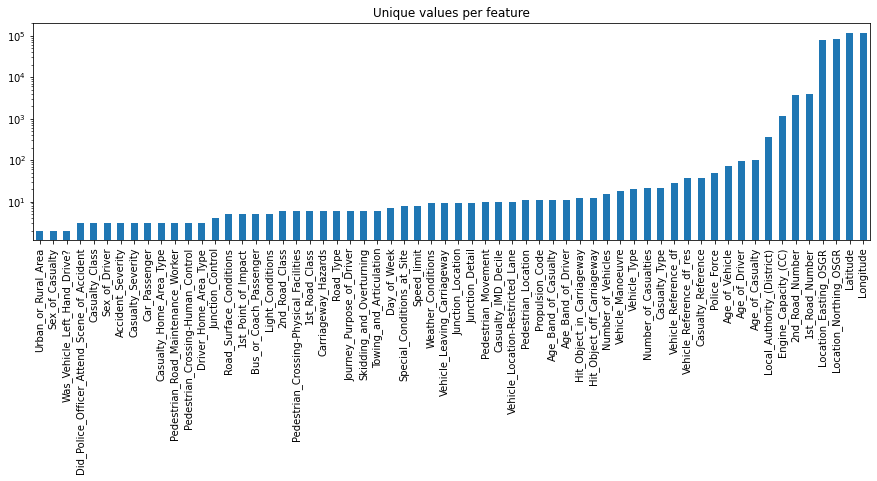

In [7]:
# Taking insights about the number of binary(2 unique values), ordinal(3 to 10 unique values) and continuous(more than 10 unique values) features in the dataset 
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
# Logy = True means using log scaling on y axis 
unique_values.plot.bar(logy=True,figsize=(15,4),title ="Unique values per feature")

The reason of doing structure investigation is haveing better understanding of the general structure of our dataset. 


Alternative way of Structural Investigation 

In [8]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

In [9]:
df_X.describe()

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,...,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,...,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,...,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


**Quality Investigation** 

Duplicated 


In [13]:
# Check number of duplicates while ignoring the index feature 
n_duplicates = df_X.drop(labels=["Accident_Index"],axis=1).duplicated().sum()
print("You seem to have duplicates in your database.",n_duplicates)

You seem to have duplicates in your database. 22


In [19]:
df_X.count().duplicated()

Accident_Index                        False
Vehicle_Reference_df_res               True
Vehicle_Type                          False
Towing_and_Articulation               False
Vehicle_Manoeuvre                     False
                                      ...  
Bus_or_Coach_Passenger                False
Pedestrian_Road_Maintenance_Worker    False
Casualty_Type                          True
Casualty_Home_Area_Type               False
Casualty_IMD_Decile                   False
Length: 67, dtype: bool

In [20]:
# Drop the duplicate values 
columns_to_consider = df_X.drop(labels=["Accident_Index"],axis=1).columns
# Drop duplicates based on columns_to_consider
df_X = df_X.drop_duplicates(subset = columns_to_consider)
df_X.shape

(363221, 67)